# Modélisation de données d'enquête en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> 
# Prévision du seuil de revenu 

    Membres du groupe : Evan GUILLON - Battista GLEMIN ORSINI - Vinauj SIVAPUSHPARAJAH

#### Résumé
Analyse du revenu ou plutôt du dépassement d'un seuil de revenu sur des données issues d'un sondage aux USA. Modélisation et prévision du dépassement d'un seuil de revenu. Comparaison de la pertinence et de l'efficacité de différentes méthodes de modélisation ou apprentissage.
## Introduction
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Ces données sont largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage ou modélisation statistique. L’objectif est  de prévoir la variable binaire « revenu annuel » (`income`) supérieur ou inférieur à 50k$. Il ne s’agit pas encore de données massives mais, en concaténant les fichiers fournis d'apprentissage et de test, 48841 individus sont décrits par les 15 variables du tableau ci-dessous. 

Num| Libellé |	Ensemble de valeurs

-|--|--|--

1|`Age`|	real

2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

3|	`fnlwgt`|	real

4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

5|	`educNum`|	integer

6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

10|	`sex`|	Female, Male

11|	`capitalGain`|	real  

12|	`capitalLoss`|	real

13|	`hoursWeek`|	real

14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

15|	`income`|		incHigh (>50K), incLow (<=50K)

Une première étape permettant de vérifier, sélectionner, recoder les données, a permis de construire un fichier de type `.csv` qui est utilisé dans ce calepin.

**Notre objectif ici est donc de comprendre quels sont les facteurs pouvant influencer sur le revenu élevé (>50k). Cela passera par une préparation des données, suivi d'une analyse exploratoire et pour finir une modélisation des données.**

# 1) Préparation des données

In [1]:
# Ici seront renseignées les bases de données utilisées pour ce projet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from matplotlib import rcParams
from matplotlib.pyplot import figure
from scipy import stats  # Importez le module stats de SciPy
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline

sns.set(style='white', context='notebook', palette='deep')

In [2]:
# On commence par charger le fichier csv
adult=pd.read_csv('adultTrainTest.csv')
adult.head()
#adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


On a commencé par charger les données tout en vérifiant qu'il n'y a pas de potentiels problèmes, le head() nous a permis de vérifier les premières données. On constate qu'il y a bien les 48841 individus annoncés qui sont bien décrits par les 15 variables présentées précedemment.

In [3]:
# Exploration des données
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           48842 non-null  int64 
 1   workClass     48842 non-null  object
 2   fnlwgt        48842 non-null  int64 
 3   education     48842 non-null  object
 4   educNum       48842 non-null  int64 
 5   mariStat      48842 non-null  object
 6   occup         48842 non-null  object
 7   relationship  48842 non-null  object
 8   origEthn      48842 non-null  object
 9   sex           48842 non-null  object
 10  capitalGain   48842 non-null  int64 
 11  capitalLoss   48842 non-null  int64 
 12  hoursWeek     48842 non-null  int64 
 13  nativCountry  48842 non-null  object
 14  income        48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


A présent, on explore les données à l'aide la commande info(). Nous pouvons maintenant visualiser nos données. Nous pouvons observer que les variables age, fnlwgt, educNum, capitalGain, capitalLoss, et hoursWeek sont numériques tandis que toutes les autres sont catégorielles.

In [4]:
# Gestion des valeurs manquantes 

# On commence par vérifier s'il y a des valeurs manquantes dans chaque colonne
valeurs_manquantes = adult.isnull().sum()
# Ensuite, on affiche le nombre de valeurs manquantes par colonne
print(valeurs_manquantes)

age             0
workClass       0
fnlwgt          0
education       0
educNum         0
mariStat        0
occup           0
relationship    0
origEthn        0
sex             0
capitalGain     0
capitalLoss     0
hoursWeek       0
nativCountry    0
income          0
dtype: int64


On constate que pour chaque variable il n'y a pas de valeurs manquantes, on peut donc des à présent travailler sur nos données en toute sécurité et avec précision. 
    Cependant, nous allons transformer la variable "Income" en variable binaire. En effet c'est notre variable cible que nous souhaitons analyser, il est donc utilie de la transformer afin de pouvoir bien la comprendre et pouvoir prédire correctement le modèle. 

In [5]:
# Transformation de "Income" en variable binaire (si income est inférieur ou égal à 50k, alors c'est égal à 0, sinon à 1)
adult['income_binaire'] = adult['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,income_binaire
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


   Parfait, maintenant que nous avons établi notre nouvelle variable binaire qui va nous permettre d'analyser notre jeu de données. 
Notre objectif dans ce projet est de comprendre les données de manière approfondie. Pour cela nous allons à présent réaliser une analyse exploratoire des données pour mieux comprendre les caractéristiques et prédire si le revenu d'un individu est supérieur à 50 000$ ou non en utilisant les caractéristiques les plus pertinentes pour notre étude.

# 2) Analyse Exploratoire des Données

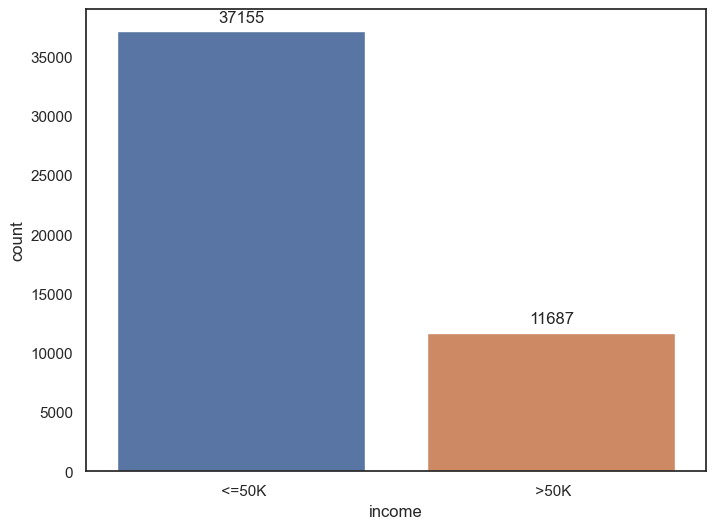

In [6]:
# On commence par une première observation de la variable Income

# On commence par créer le graphique
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='income', data=adult, label="Count")
# Ensuite on ajoute le nombre d'observations au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
# Puis on termine par afficher le graphique
plt.show()

On observe ainsi **11 687** individus qui ont un salaire annuel supérieur à 50 000 dollars contre **37 155** individus qui possèdent moins. 

Ils représentent **24%** de notre jeu de données. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educNum'}>,
        <AxesSubplot:title={'center':'capitalGain'}>],
       [<AxesSubplot:title={'center':'capitalLoss'}>,
        <AxesSubplot:title={'center':'hoursWeek'}>]], dtype=object)

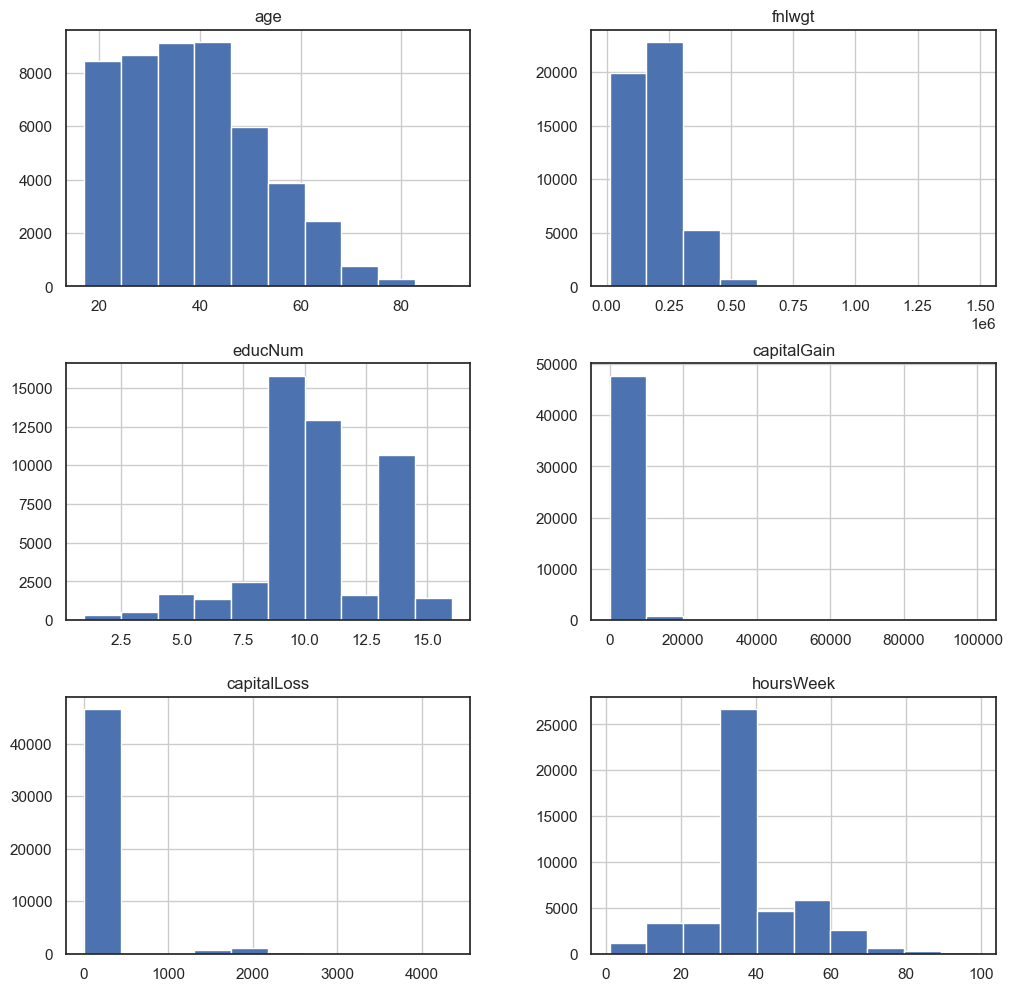

In [7]:
# Seconde analyse des variables numériques à travers des histogrammes
rcParams['figure.figsize'] = 12, 12
adult[['age', 'fnlwgt', 'educNum', 'capitalGain', 'capitalLoss', 'hoursWeek']].hist()

Il est possible de visualiser que les données telles que les plus-values, les moins-values et les revenus sont asymétriques et que d'autres colonnes peuvent être regroupées pour une meilleure visualisation. Cependant nous voyons bien la distribution des trois autres. Pour comprendre en détail nos données, nous allons observer les chiffres grâce à la fonction describe().

In [8]:
adult.describe()

,age,fnlwgt,educNum,capitalGain,capitalLoss,hoursWeek,income_binaire
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


On peut ajouter que la population est assez jeune avec une moyenne d'age de 39 ans.

Plus de la moitié de l'échantillon a réalisé au moins 10 années d'études.

Le nombre d'heures de travail par semaine médian est de 40 heures. 

Et 1/4 des personnes touchent plus de 50 000$ par an

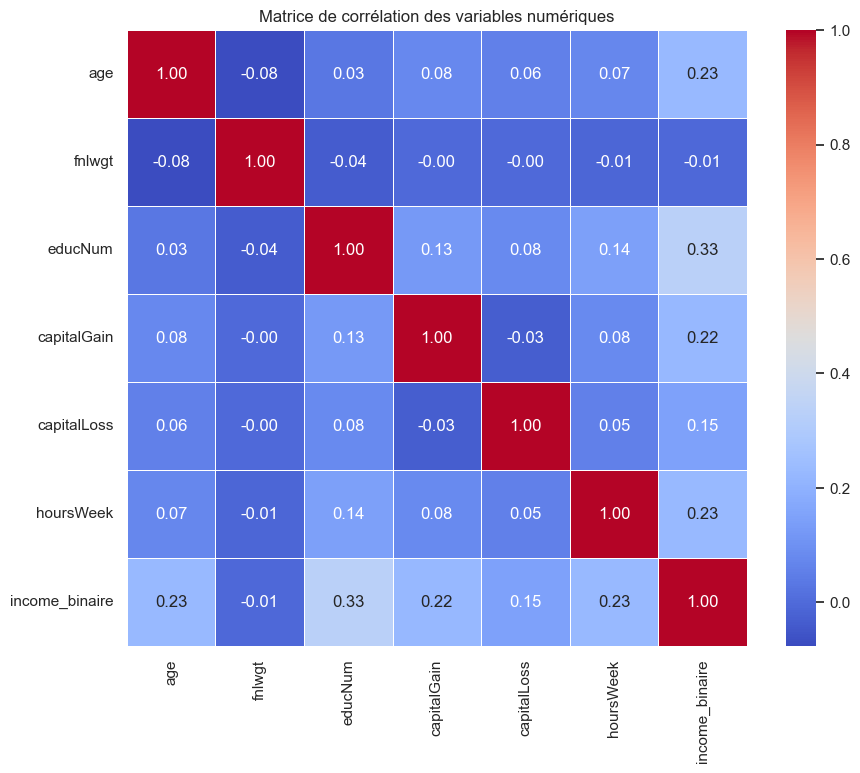

In [9]:
# Visualisations des relations entre les variables numériques à l'aide de graphiques
# Pour cela, on crée une matrice de corrélation pour les variables numériques
matrice_corrélation = adult.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corrélation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

La variable "fnlwgt" ne montre aucune relation avec les autres variables, nous allons donc la supprimer puisqu'elle n'est pas utile dans notre projet. 

Par contre à l'inverse, la variable educNum semble montrer une meilleure relation avec 0.33 ce qui pourrait nous laisser croire que cette variable aura toute son importance dans nos analyses finales.

In [10]:
adult.drop(['fnlwgt'], axis = 1, inplace = True)

### Analyse détaillée et lien avec la Variable "Income"

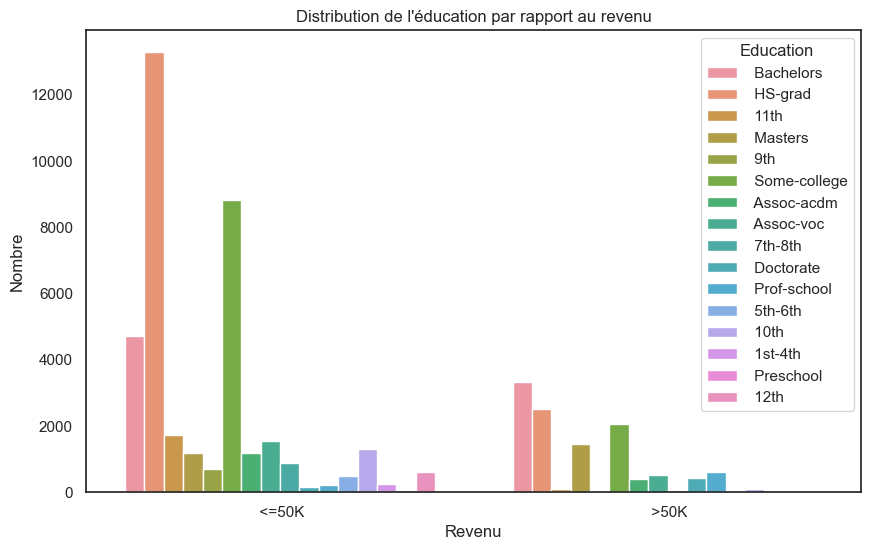

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='education', data=adult)
plt.title('Distribution de l\'éducation par rapport au revenu')
plt.xlabel('Revenu')
plt.ylabel('Nombre')
plt.legend(title='Education')
plt.show()

Il est important d'affirmer et de constater à travers nos données que les individus gagnant plus de 50 000$ par an sont ceux ayant eu des études longues (au moins 12 années d'études). On retrouve dans notre jeu de données les individus ayant obtenus leur équivalent baccalauréat, ceux ayant eu un master, les "some-college" équivalant DUT/BTS et aussi ceux qui sont en HS-grad qui vont obtenir leur Bac.

A contrario, dans ceux ayant moins de 50 000 dollars, il y a une majorié de HS-grad, suivi des "some-college" et ensuite les bachelors. Les autres catégories sont présentes mais ont un poids plus faible sur notre jeu de données. En tout cas de ce que nous pouvons lire, plus les individus poursuivent leurs études, plus ils vont avoir une chance d'avoir un salaire supérieur à 50 000$.

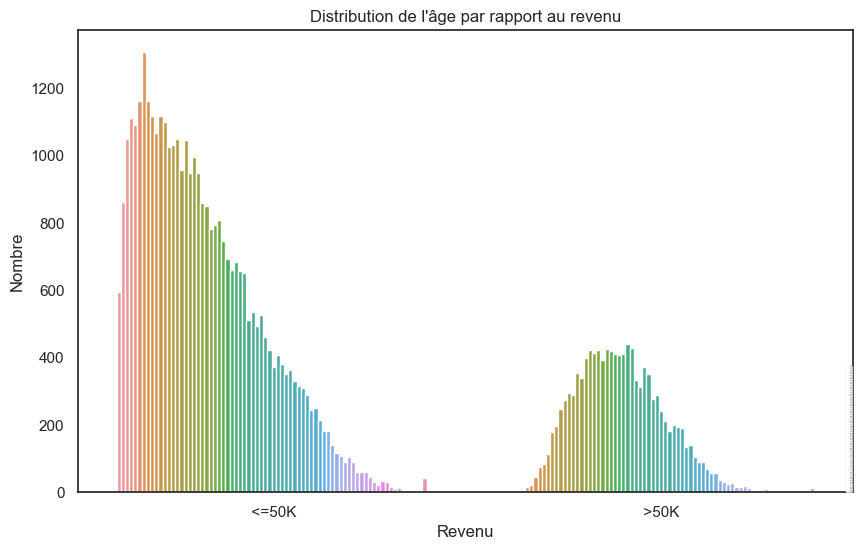

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='age', data=adult)
plt.title('Distribution de l\'âge par rapport au revenu')
plt.xlabel('Revenu')
plt.ylabel('Nombre')
plt.legend(loc='lower right', fontsize=0)
plt.show()

Comme nous pouvons le constater de manière flagrante, l'âge pourrait être un indicateur d'un revenu supérieur. En effet, nous voyons que les individus gagnant moins de 50 000 dollars par an sont en majorité des jeunes tel que nous le monntrent les distributions ci-dessus.

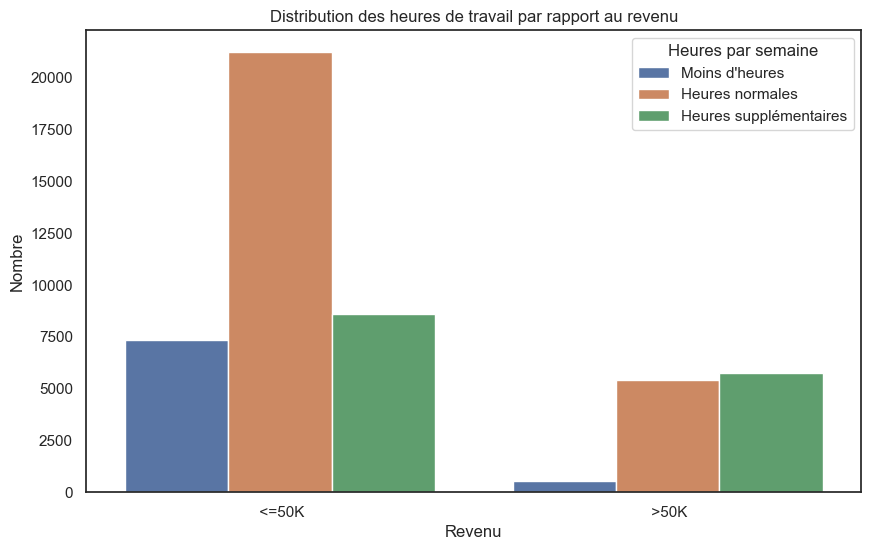

In [13]:
# Etant donné le grand nombre d'heures, nous allons les regrouper en 3 catégories avant de simplifier la lisibilité
adult_bis = adult
adult_bis['Heures par semaine'] = pd.cut(adult_bis['hoursWeek'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ["Moins d'heures", 'Heures normales', 'Heures supplémentaires'])
# Créer le graphique empilé
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='Heures par semaine', data=adult_bis)
plt.title('Distribution des heures de travail par rapport au revenu')
plt.xlabel('Revenu')
plt.ylabel('Nombre')
plt.legend(title='Heures par semaine', loc='upper right')
plt.show()

On constate de manière evidente que la norme pour la plupart des personnes est de gagner moins de 50 000$ par an. Ceux-ci respectent le nombre d'heures de travail par semaine (entre 30 et 40 heures). Mais pour ceux qui gagnent plus de 50 000 dollars par mois, ils font pour la plupart davantage d'heures (heures supplémentaires), ceux-ci dépassent les normes conventionnelles. L'idée ici serait que plus on fait d'heures plus le salaire augmente, ce qui est logique. Mais le fait étonnant qu'on peut noterest que pour ceux gagnant plus de 50 000 dollars par mois, il y a plus d'individus qui font des heures supplémentaires que d'individus qui font des heures standards.

<AxesSubplot:xlabel='nativCountry', ylabel='count'>

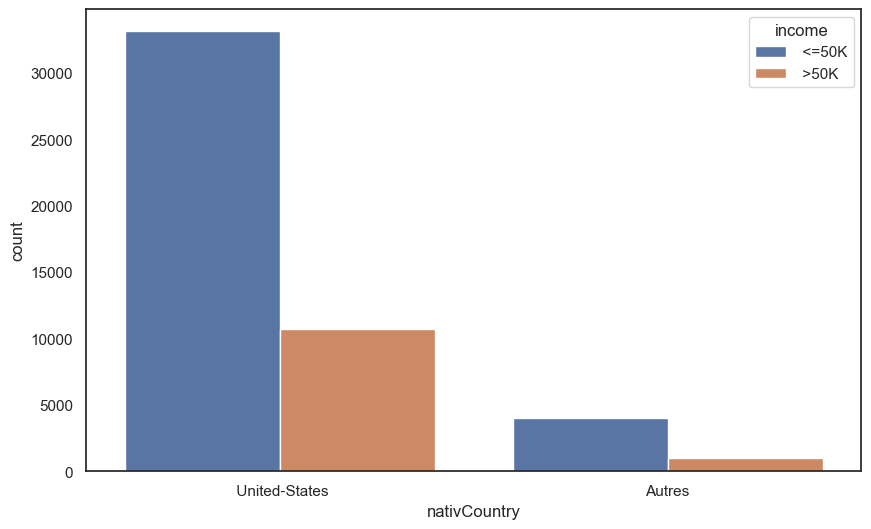

In [14]:
# Comparons maintenant ceux qui viennent des Etats-Unis et les étrangers
pays = np.array(adult['nativCountry'].unique())
pays = np.delete(pays, 0)
adult['nativCountry'].replace(pays, 'Autres', inplace = True)
adult['nativCountry'].replace(pays, 'Autres', inplace = True)
plt.figure(figsize=(10, 6))
sns.countplot(x = 'nativCountry', hue = 'income', data = adult)

Ici, par rapport à nos observations précédentes, on constate que le pays n'a pas d'impact sur la rémunération. En effet le ratio semble être le même, et d'une manière visuelle il n'y a pas de réelle différence. Ainsi on peut dire que le pays n'apporte pas une réelle importance dans la rémunération des individus.

# 3) Modélisation des données

 Notre objectif dans cette 3ème partie est de rechercher le meilleur moyen de modéliser les données. 
    
 **Alors, quel sera le meilleur modèle ?** Voyons ceci maintenant

In [15]:
# On commence par séparer les données en mettant d'un coté nos données et de l'autre notre variable binaire ciblée
X = adult.drop(['income_binaire', 'income', 'Heures par semaine', 'educNum'], axis=1)
Y = adult['income_binaire']
X

,age,workClass,education,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Autres
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,?,HS-grad,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [16]:
# On crée un ensemble d'entrainement et de test afin de faire l'apprentissage automatique, on garde 20% pour les tests.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
# Ici on transforme nos variables catégorielles pour pouvoir les manipuler dans notre modélisation
variables_categorielles = ['workClass','education', 'mariStat', 'occup', 'relationship','origEthn', 'sex','nativCountry']
for feature in variables_categorielles:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [18]:
# Utilisation de StandardScalar pour normaliser le jeu de données
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [19]:
X_train.head()

,age,workClass,education,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry
0,-1.508001,0.772908,-2.398374,0.920967,1.280528,0.966500,0.393244,0.705262,-0.145711,-0.216481,-2.042627,-0.336391
1,-0.193642,-1.279036,-0.591038,0.920967,0.807278,-0.277662,0.393244,-1.417913,-0.145711,-0.216481,-0.034306,-0.336391
2,1.704876,0.088927,0.183535,-0.407037,0.097404,-0.899743,0.393244,0.705262,-0.145711,-0.216481,0.608357,-0.336391
3,-0.631762,1.456889,0.183535,-0.407037,-0.612470,-0.899743,0.393244,0.705262,-0.145711,-0.216481,2.777344,-0.336391
4,-0.996862,0.088927,-2.140184,-0.407037,0.334029,2.210662,0.393244,-1.417913,-0.145711,-0.216481,-0.034306,-0.336391


### Création de tous les modèles pour trouver le meilleur pour notre future modélisation

Mais avant ça, nous allons les présenter pour pouvoir comprendre leurs utilitées qu'ils peuvent apporter : 

- **Machine à vecteurs de support (SVM)** : Les machines à vecteurs de support sont des algorithmes d'apprentissage supervisé utilisés pour la classification et la régression. Ils fonctionnent en trouvant l'hyperplan optimal qui sépare les données dans un espace multidimensionnel.


- **L'Algorithme des K plus proches voisins (KNN)** : KNN est un algorithme simple d'apprentissage supervisé utilisé pour la classification et la régression. Il fonctionne en trouvant les k voisins les plus proches d'un point de données et en attribuant la classe basée sur la majorité des voisins.


- **Regression Logistique** : La régression logistique est un modèle statistique utilisé pour la classification binaire. Elle modélise la probabilité qu'une variable dépendante binaire prenne une certaine valeur en fonction des variables indépendantes.


- **Classification naïve bayésienne** : La Classification naïve bayésienne est un algorithme d'apprentissage supervisé basé sur le théorème de Bayes et l'hypothèse naïve d'indépendance conditionnelle. Il est souvent utilisé pour la classification de texte et d'autres tâches où les caractéristiques sont indépendantes.


- **Arbre de Décision** : Les arbres de décision sont des modèles d'apprentissage supervisé qui divisent récursivement l'espace de caractéristiques en sous-espaces homogènes basés sur des règles de décision simples. Ils sont faciles à interpréter et peuvent capturer des relations non linéaires entre les caractéristiques et la variable cible.


- **Forêt d'arbres de décision** : Le Random Forest est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. Il construit plusieurs arbres de décision et combine leurs prédictions pour améliorer la précision et réduire le surajustement.

In [20]:
# Application de l'algorithme de régression logistique
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [21]:
# Mise en place de la méthode des KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

C:\Users\evang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\evang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [22]:
# Préparation de l'algorithme de la classification bayesienne naïve
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [24]:
# Utilisation des machines à vecteurs de support même si elles ne seront pas forcement utilisées
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\evang\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
# Mise en place de l'algorithme de l'arbre de décision
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [26]:
# Pour finir la Forêt d'arbres de décision
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### Quel est le meilleur moyen de modélisation pour notre jeu de données ?

In [27]:
# On passe maintenant à la représentation graphique de la précision des algorithmes utilisés pour trouver la meilleure adéquation
results = pd.DataFrame({
    'Modele': ['Machine à vecteurs de support', 'K plus proches voisins', 'Regression Logistique', 'Classification Bayesienne naive', 'Arbre de Décision', "Forêt d'arbres de décision"],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_gaussian, acc_decision_tree, acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Modele
Score,
97.45,Arbre de Décision
97.45,Forêt d'arbres de décision
89.71,K plus proches voisins
80.37,Machine à vecteurs de support
80.12,Regression Logistique
79.78,Classification Bayesienne naive


Nous pouvons ainsi voir que tous les modèles sont bons avec au moins 80% de précision. Cependant deux types de modélisation ressortent et c'est l'arbre de décision et la forêt d'arbre de décision ! Ceux-ci ont une précision de 97% ce qui est excellent pour nous ! Nous allons donc réaliser une forêt d'arbres de décision pour comprendre nos données.

In [29]:
# Ensuite on passe à la détermination de l'importance de chaque caractéristique dans le modèle de l'arbre de décision
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.226
capitalGain,0.134
relationship,0.120
hoursWeek,0.116
education,0.104
occup,0.094
mariStat,0.067
workClass,0.052
capitalLoss,0.044


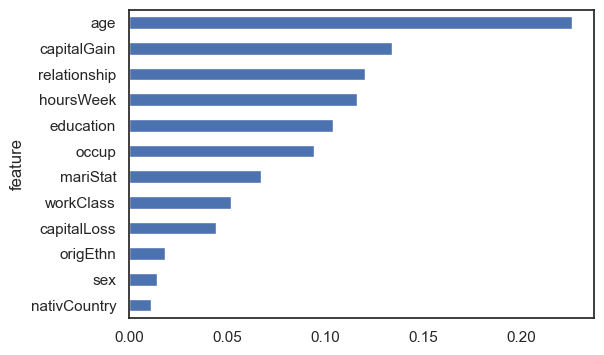

In [30]:
# Voyons les caractéristiques les plus intéressantes dans notre modème d'arbre de décision
# On ajoute un histogramme montrant l'importance de chacun graphiquement
importances.plot.barh(figsize=(6, 4), legend=False).invert_yaxis()

On note que l'âge pourrait avoir une part importante dans notre futur arbre de décision. 

Et puisqu'elles n'ont pratiquement pas d'importance, on peut supprimer les variables "sex", "origEthn", "nativCountry" et "mariStat" pour éviter l'ajustement excessif.

In [31]:
adult  = adult.drop("sex", axis=1)
adult  = adult.drop("origEthn", axis=1)
adult  = adult.drop("nativCountry", axis=1)

In [32]:
# On souhaite vérifier que notre arbre de décision n'a pas une baisse de précision
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_prediction = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

97.45 %


On peut noter que la précision reste la même même après avoir supprimé les colonnes.

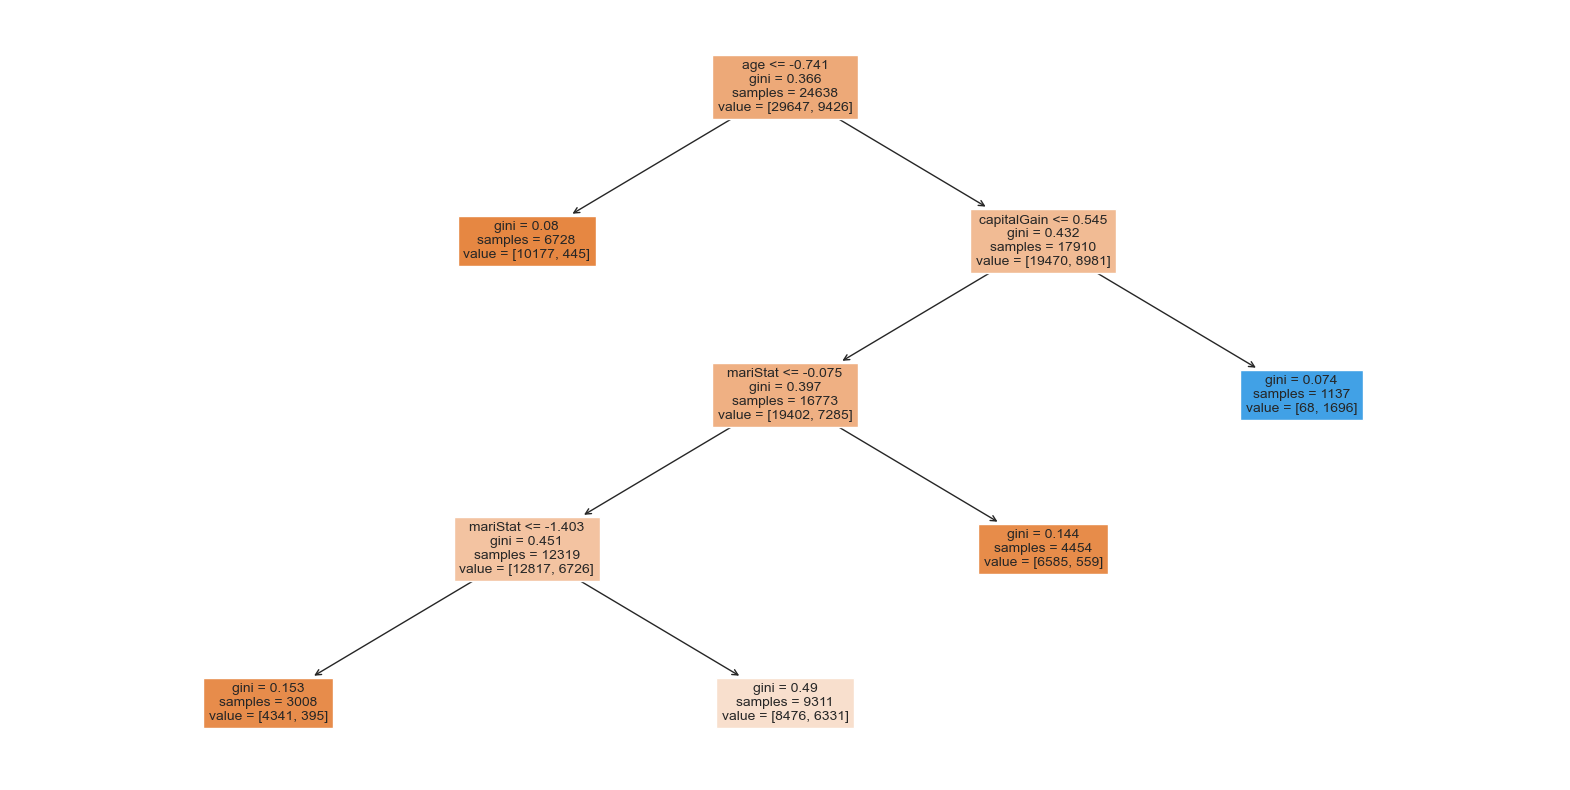

In [55]:
# Créer et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_leaf=1, ccp_alpha=0.01)
random_forest.fit(X_train, Y_train)

# Extraire le premier arbre de décision de la forêt (vous pouvez choisir un autre index si vous le souhaitez)
arbre = random_forest.estimators_[0]

# Visualiser l'arbre de décision
figure(figsize=(20, 10))
plot_tree(arbre, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

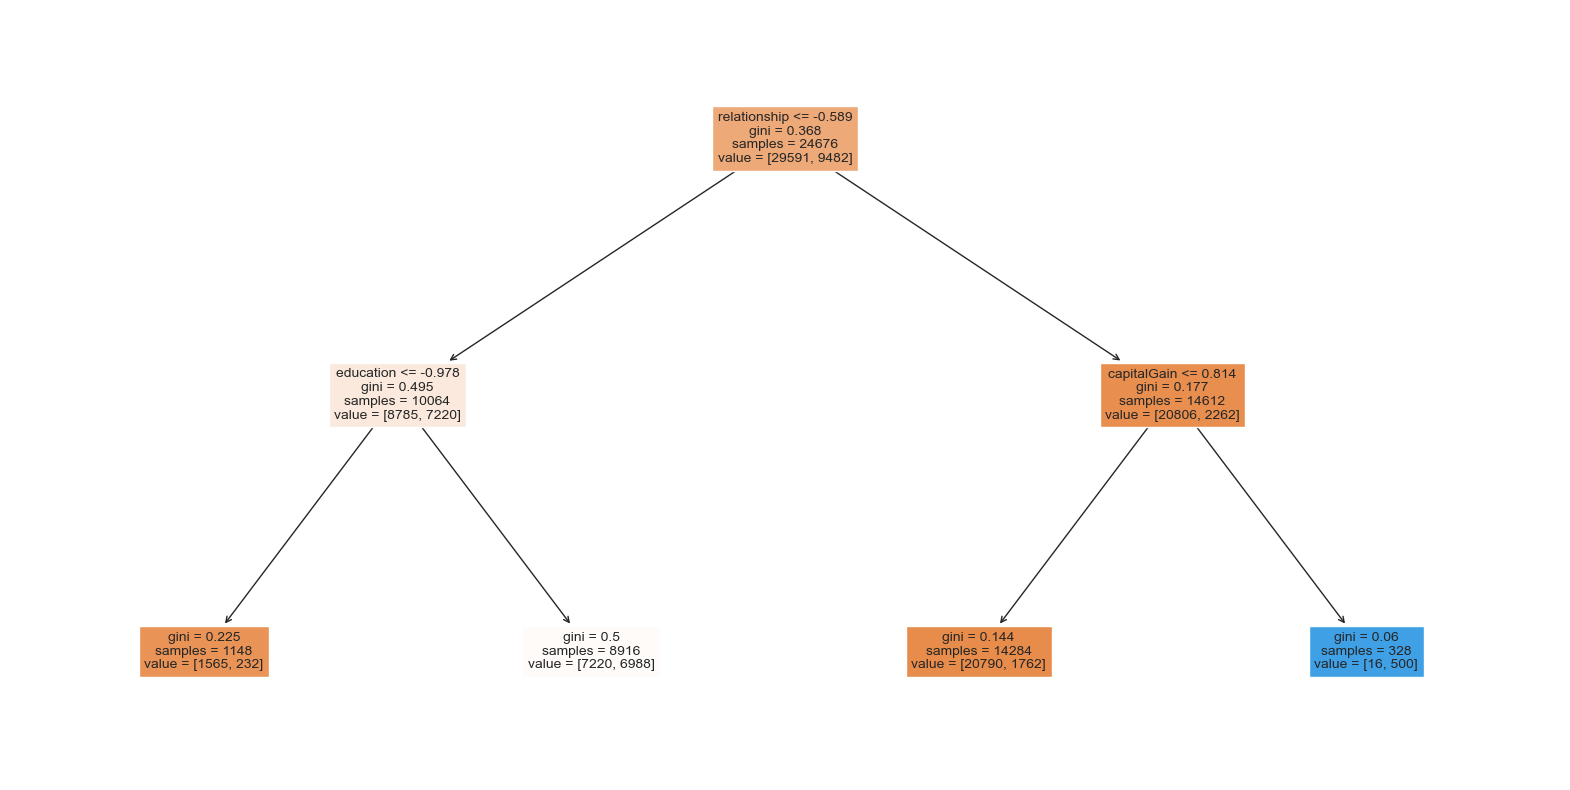

In [54]:
# Créer et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_leaf=1, ccp_alpha=0.01)
random_forest.fit(X_train, Y_train)

# Extraire le premier arbre de décision de la forêt (vous pouvez choisir un autre index si vous le souhaitez)
arbre = random_forest.estimators_[1]

# Visualiser l'arbre de décision
figure(figsize=(20, 10))
plot_tree(arbre, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

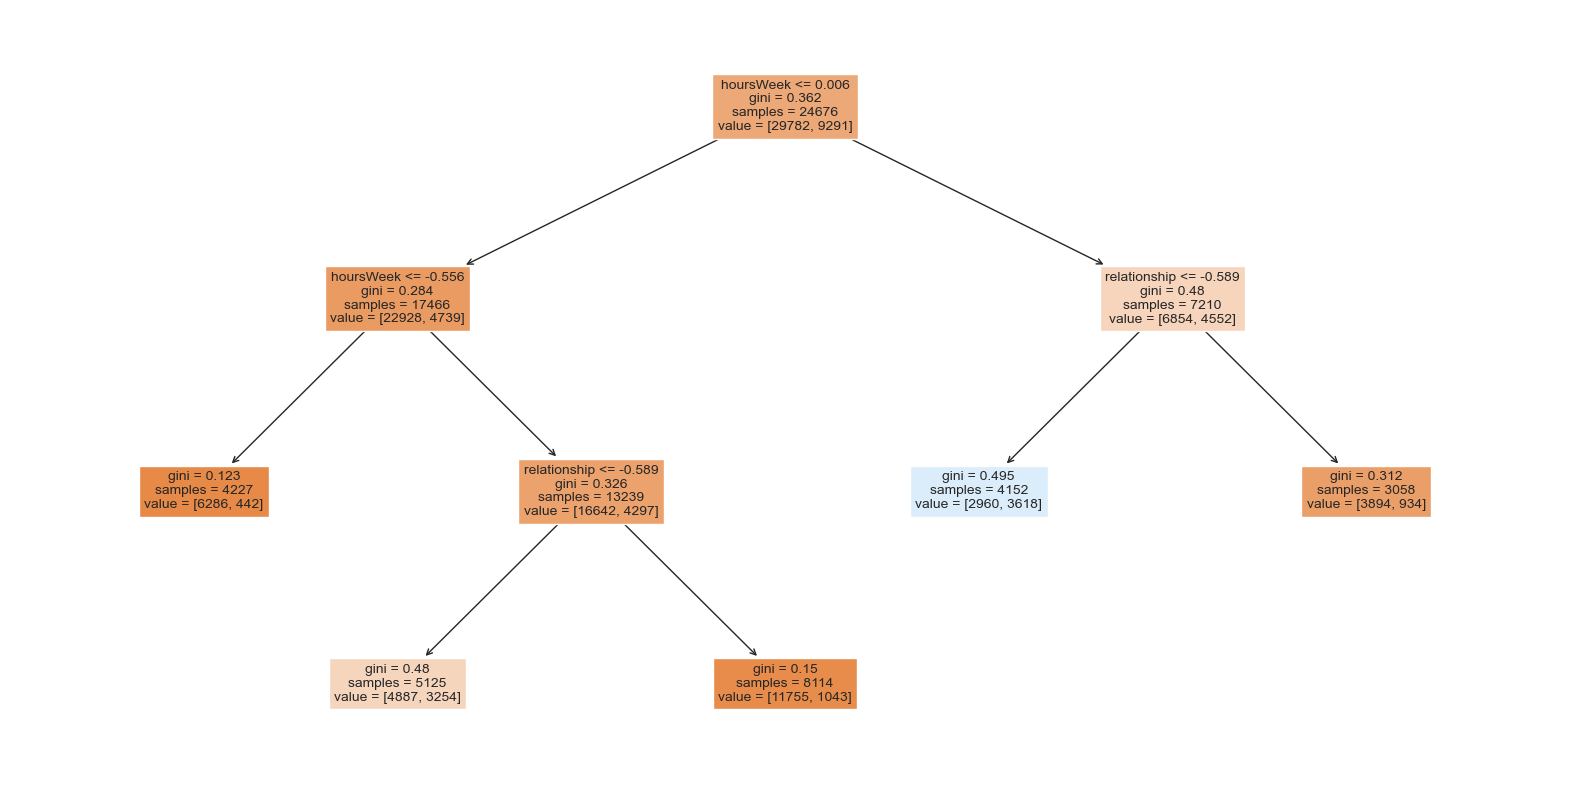

In [52]:
# Créer et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_leaf=1, ccp_alpha=0.01)
random_forest.fit(X_train, Y_train)

# Extraire le premier arbre de décision de la forêt (vous pouvez choisir un autre index si vous le souhaitez)
arbre = random_forest.estimators_[2]

# Visualiser l'arbre de décision
figure(figsize=(20, 10))
plot_tree(arbre, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

### Interprétation de l'arbre de décision

**Analyse Complète des Arbres de Décision pour Prédire un Revenu Supérieur à 50 000 Dollars**

La réalisation de l’arbre de décision a pour objectif d’identifier les facteur influençant le plus la plus probabilité qu’un individu gagne plus de 50000 dollars par ans. Pour réaliser cette analyse, nous allons exploiter trois arbre de décision provenant d’un « random forest ». Ces arbres sont entrainés par notre jeu de données dans lesquels on retrouve des informations sur les caractéristiques démographiques, professionnelles et socio-démographique des individus. 

**Analyse des Arbres de Décision**

La réalisation de l’arbre de décision a pour objectif d’identifier les facteur influençant le plus la plus probabilité qu’un individu gagne plus de 50000 dollars par ans. Pour réaliser cette analyse, nous allons exploiter trois arbre de décision provenant d’un « random forest ». Ces arbres sont entrainés par notre jeu de données dans lesquels on retrouve des informations sur les caractéristiques démographiques, professionnelles et socio-démographique des individus. 

**Facteurs Influents**

Les trois arbres de décisions vont identifier chacun des facteurs distincts comme étant les plus importants pour la prédiciton de la classe de revenu. Néanmoins, nous voyons que certains facteurs vont apparaitre dans plusieurs arbres, ce qui va suggèrer une influence significative sur le revenu. 

**Quels sont les facteurs importants qui ressortent**

* **Heures de travail par semaine (hoursWeek):** Nous retrouvons ce facteur qui nous permet de comprendre que le nombre d’heures travaillés par semaine jour un rôle important dans la détermination du revenu. 

* **Relation (relationship):** Ce facteur est présent dans deux de nos arbres de décision et il est utilisé pour une division précoce. Ici, le statut relationnel de l’individu (célibataire, marié …) peut avoir un impact sur son revenu.

* **Statut marital (maritalStatus):** Nous retrouvons ce facteur uniqumment lors de la réalisation de notre premier arbre pour une division précoce. Le statut marital a un impact sur le revenu mais il est moindre en comparaison des deux autres facteurs.

* **Gain en capital (capitalGain):** Ce facteur est présent dans le premier et dans le second arbre de décision et est utilisé pour une division ultérieure. Le gain en capital a un impact sur le revenu mais un impact moindre dessus (bien que celui-ci permet de constater une partie du revenu également).

* **L'âge des individus (Age):** Nous retrouvons l’âge des individus uniquement dans le premier arbre. On voit grâce à ce facteur que plus l’individu est age, plus il a de chance d’obtenir un meilleur salaire.

**Interprétation des Règles de Décision**

Avec les arbres de décision, nous devons fournir des règles de décisions qui vont permettre aux lecteurs de comprendre comment les facteurs influencent la probabilité qu’un individu gagne plus de 50000 dollars par ans. Par exemple, pour expliquer plus simple, dans le premier arbre un individu marié, travaillant plus de 40 heures par semaine et avec un gain en capital positif, est plus susceptible de gagner plus de 50000 dollars par ans.

**Limites**

Il est important de souligner que cette analyse se base uniquement sur l’observation des arbres de décision. Pour une analyse plus complète et précise, il semble nécessaire d’avoir accès aux données d’entrainement et de test, ainsi qu’aux paramètres d’apprentissage utilisé pour générer les arbres. En outre, les arbres de décision sont des modèles de classification non linéaire, rendant l’interprétation des résultats et la compréhension des mécanismes de prédiction difficile. Pour obtenir un meilleur aperçu du fonctionnement des arbres de décision, des techniques d’explication de modèles peuvent être utilisés.

### Conclusion

Les arbres de décision fournissent des informations précieuses sur les facteurs qui influencent le revenu. Grace à ce rapport et son analyse, on peut identifier plusieurs facteurs importants tels que les heures de travail, la relation, le revenu et le gain en capital. Néanmoins, il faut garder à l’esprit que les arbres de décision sont des modèles simples utilisés sont des modèles simples et que d’autres facteurs peuvent également jouer un rôle dans la détermination du revenu d’un individu. Il semble opportun de conduire des recherches approfondies pour identifier et comprendre tous les facteurs en jeu.

**Recommandations**


**Investir dans l'éducation et la formation professionnelle**

Les individus avec un niveau d’éducation élevé et des compétences professionnelles plus pointues tendent à gagner des revenus plus élevés. Il semble aussi qu’avec ce bagage, ils ont accès des emplois mieux rémunères et sont susceptible d’être promus. De plus, les personnes instruites sont généralement plus aptes à s’adapter aux changements du marché du travail et à acquérir de nouvelles compétences.

Voici quelques exemples d'investissements dans l'éducation et la formation professionnelle :

* Obtenir un diplôme universitaire ou supérieur
* Suivre des cours de formation continue
* Obtenir des certifications professionnelles
* Participer à des conférences et à des ateliers

**Travailler plus d'heures**

Le nombre d'heures travaillées par semaine est un facteur important qui détermine le revenu. En général, plus un individu travaille d'heures, plus il gagne d'argent. Cela est particulièrement vrai pour les travailleurs salariés qui sont payés à l'heure.

Il existe plusieurs façons d'augmenter le nombre d'heures travaillées par semaine, notamment :

* Demander à son employeur d'augmenter ses heures de travail
* Prendre un deuxième emploi
* Créer sa propre entreprise
* Travailler en freelance


**Avis Final sur l'étude**

L’étude nous montre bien qu’il n’existe pas qu’une seule formule pour gagner plus de 50000 dollars par an. Cependant, si les individus suivent certaines des recommandations émises précedement, les individus vont augmenter leur probabilité assez fortement pour attendre cet objectif de sécurité monétaire. Il semble important de rappeler que le succès nécessite du travail, de la persévérance mais egalement un peu de chance. 
Il semble bon de rappeler qu’il ne faut pas faire une généralité des recommandations émise car elle ne s’applique pas à tous les individus. Il est toujours aussi préférable de consulter des professionnels qui pourront donner de bons conseils pour augmenter d’une manière ou une autre les revenus.
En ces temps de crise, la tentative mathématiquement et plus formel de ces études peut sembler rassurante mais il faut toujours un petit plus pour pouvoir s’enrichir. 
